### IMPORT LIBRARIES

In [638]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import simps

### DEFINE PARAMETERS

In [639]:
## INPUT SEGMENT
k=2;            #Halbach coefficient (1=dipole, 2= quadrupole,...)

# Parameters for the inner segment
ri1 = 8 / 100  # inner radius in meters
ro1 = 8.6 / 100  # outer radius in meters
N1 = 26  # number of segments (magnets)

# Parameters for the outer segment
ri2 = 10 / 100  # inner radius in meters
ro2 = 10.6 / 100  # outer radius in meters
N2 = 28  # number of segments (magnets)

typ=1;           #typ of Mandhala (1=cylindrical segment, 2 = circular, 3= trigonal,..., m= number of vertices...)
a=6/1000;        #side length of magnet [m], if = 0, a is calculated from d (next) 
d=15/1000;       #distance between magnets [m], if a~=0 d is ignored
L=10/1000;       #axial length [m] 

z01=(ro1+ri1)/2/np.sqrt(2*k+4);
Z01=[-z01,z01];    #position of multiple identical inner rings in z-dimension [m]

z02=(ro2+ri2)/2/np.sqrt(2*k+4);
Z02=[-z02,z02];    #position of multiple identical outer rings in z-dimension [m]

BR=0.950;        #remanence [T](SmCo magnets)
mr=1.05;        #relative permeability 

nx=100;         #number of points for field plots
ny=100;
scale=5;        #scaling for vector plot, pts = nx/scale 

In [640]:
Z01

[-0.029344931419241715, 0.029344931419241715]

In [641]:
Z02

[-0.0364159992311072, 0.0364159992311072]

### INNER SEGMENT CALCULATION

In [642]:
phi=np.pi/typ;      #Rotation of each Mandhala element
R1=(ro1+ri1)/2;      #Central radius

# Calculation of ideal Halbach
B01=BR*k/(k-1)*(ri1**(1-k)-ro1**(1-k));
unit=' T/m';

#calculation of permittivity effect
theta=(mr+1)/(mr-1);
fm1=(1-theta)*theta*ro1**2/(ri1**2-theta**2*ro1**2);

#calculation of segmentation
fs1=np.sin((k+1)*np.pi/N1)/((k+1)*np.pi/N1);

#calculation of polygonal effect
if (a!=0):
  if (typ==1):
    a=0;

A1=np.pi*(ro1**2-ri1**2)-d*N1*(ro1-ri1);
fM1=A1/np.pi/(ro1**2-ri1**2);

##calc truncation in 3rd dimension
denomi1=(4*R1**2+L**2);
fL1=L*(L**4+10*L**2*R1**2+30*R1**4)*denomi1**(-5/2);

### OUTER SEGMENT CALCULATION

In [643]:
phi=np.pi/typ;      #Rotation of each Mandhala element
R2=(ro2+ri2)/2;      #Central radius

# Calculation of ideal Halbach
B02=BR*k/(k-1)*(ri2**(1-k)-ro2**(1-k));
unit=' T/m';

#calculation of permittivity effect
theta=(mr+1)/(mr-1);
fm2=(1-theta)*theta*ro2**2/(ri2**2-theta**2*ro2**2);

#calculation of segmentation
fs2=np.sin((k+1)*np.pi/N2)/((k+1)*np.pi/N2);

#calculation of polygonal effect
if (a!=0):
  if (typ==1):
    a=0;

A2=np.pi*(ro2**2-ri2**2)-d*N2*(ro2-ri2);
fM2=A2/np.pi/(ro2**2-ri2**2);

##calc truncation in 3rd dimension
denomi2=(4*R2**2+L**2);
fL2=L*(L**4+10*L**2*R2**2+30*R2**4)*denomi2**(-5/2);

### CALCULATION OUTPUT FOR INNER SEGMENT

In [644]:
## OUTPUT VALUES
alignvalue=90
print('__________________________________________________________________________________________')
print(' ')
pole='QUADRUPOLE';

s='cylindrical inner Halbach '+pole[k-1]+':  with k = {0:.0f} ({1:0.0f} poles)'.format(k,2*k);
print(s.center(alignvalue));

print(' - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -');
s='inner radius = {0:.3f} mm, outer radius = {1:.3f} mm, central radius = {2:.3f} mm'.format(ri1*1000,ro1*1000,R1*1000);
print(s.rjust(alignvalue));
s='distance between magnets = {0:.3f} mm, magnet side length = {1:.3f} mm;  remanence = {2:.3f} T'.format(d*1000,a*1000,BR);
print(s.rjust(alignvalue));
print(' - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -');
flux='B';
for jj in range(k-1):
    flux=flux+"'";
s='ideal  >> '+flux+' = {0:.3f}'.format(B01);
s=s+unit;
print(s.rjust(alignvalue));
s='discretized in {0:.0f} segments  >> '.format(N1)
s=s+flux;
s=s+' = {0:.3f}'.format(B01*fs1);
s=s+unit;
print(s.rjust(alignvalue));

s='using a rel. permeability of {0:.0f} >> '.format(mr);
s=s+flux;
s=s+' = {0:.3f}'.format(B01*fs1*fm1);
s=s+unit;
print(s.rjust(alignvalue));

shape='cylindrical segments';
s='using {0:.0f} '.format(N1);
s=s+shape[typ-1];
s=s+' with side length {0:.3f} mm >> '.format(a*1000);
s=s+flux;
s=s+' = {0:.3f}'.format(B01*fs1*fm1*fM1);
s=s+unit;
print(s.rjust(alignvalue));

if (fL1==0):
     s='truncated to a length of {0:.3f} mm >> '.format(L*1000);
     s=s+flux;
     s=s+'  **** for this k no factor could be calculated ';
     print(s.rjust(alignvalue));
else:
     s='truncated to a length of {0:.3f} mm >> '.format(L*1000);
     s=s+flux;
     s=s+' = {0:.3f}'.format(B01*fs1*fm1*fM1*fL1);
     s=s+unit;
     print(s.rjust(alignvalue));

__________________________________________________________________________________________
 
                    cylindrical inner Halbach U:  with k = 2 (4 poles)                    
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
            inner radius = 80.000 mm, outer radius = 86.000 mm, central radius = 83.000 mm
 distance between magnets = 15.000 mm, magnet side length = 0.000 mm;  remanence = 0.950 T
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
                                                                  ideal  >> B' = 1.657 T/m
                                             discretized in 26 segments  >> B' = 1.621 T/m
                                          using a rel. permeability of 1 >> B' = 1.582 T/m
                                    using 26 c with side length 0.000 mm >> B' = 0.399 T/m
                                      truncated to a length of 10.000 mm >> B' = 0.045 T

### CALCULATION OUTPUT FOR INNER SEGMENT

In [645]:
## OUTPUT VALUES
alignvalue=90
print('__________________________________________________________________________________________')
print(' ')
pole='QUADRUPOLE';

s='cylindrical inner Halbach '+pole[k-1]+':  with k = {0:.0f} ({1:0.0f} poles)'.format(k,2*k);
print(s.center(alignvalue));

print(' - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -');
s='inner radius = {0:.3f} mm, outer radius = {1:.3f} mm, central radius = {2:.3f} mm'.format(ri2*1000,ro2*1000,R2*1000);
print(s.rjust(alignvalue));
s='distance between magnets = {0:.3f} mm, magnet side length = {1:.3f} mm;  remanence = {2:.3f} T'.format(d*1000,a*1000,BR);
print(s.rjust(alignvalue));
print(' - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -');
flux='B';
for jj in range(k-1):
    flux=flux+"'";
s='ideal  >> '+flux+' = {0:.3f}'.format(B02);
s=s+unit;
print(s.rjust(alignvalue));
s='discretized in {0:.0f} segments  >> '.format(N2)
s=s+flux;
s=s+' = {0:.3f}'.format(B02*fs2);
s=s+unit;
print(s.rjust(alignvalue));

s='using a rel. permeability of {0:.0f} >> '.format(mr);
s=s+flux;
s=s+' = {0:.3f}'.format(B02*fs2*fm2);
s=s+unit;
print(s.rjust(alignvalue));

shape='cylindrical segments';
s='using {0:.0f} '.format(N2);
s=s+shape[typ-1];
s=s+' with side length {0:.3f} mm >> '.format(a*1000);
s=s+flux;
s=s+' = {0:.3f}'.format(B02*fs2*fm2*fM2);
s=s+unit;
print(s.rjust(alignvalue));

if (fL2==0):
     s='truncated to a length of {0:.3f} mm >> '.format(L*1000);
     s=s+flux;
     s=s+'  **** for this k no factor could be calculated ';
     print(s.rjust(alignvalue));
else:
     s='truncated to a length of {0:.3f} mm >> '.format(L*1000);
     s=s+flux;
     s=s+' = {0:.3f}'.format(B02*fs2*fm2*fM2*fL2);
     s=s+unit;
     print(s.rjust(alignvalue));

__________________________________________________________________________________________
 
                    cylindrical inner Halbach U:  with k = 2 (4 poles)                    
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
         inner radius = 100.000 mm, outer radius = 106.000 mm, central radius = 103.000 mm
 distance between magnets = 15.000 mm, magnet side length = 0.000 mm;  remanence = 0.950 T
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
                                                                  ideal  >> B' = 1.075 T/m
                                             discretized in 28 segments  >> B' = 1.055 T/m
                                          using a rel. permeability of 1 >> B' = 1.030 T/m
                                    using 28 c with side length 0.000 mm >> B' = 0.362 T/m
                                      truncated to a length of 10.000 mm >> B' = 0.033 T

### CALCULATE 2D B-FIELD (INNER SEGMENT)

In [646]:

Xx1=np.linspace(-ri1,ri1,nx); #coordinates
Yy1=np.linspace(-ri1,ri1,ny);
Bx1=np.zeros((nx,ny));  #Bx-component
By1=np.zeros((nx,ny));  #By-component
Ba1=np.zeros((nx,ny));  #magnitude 
for ix in range(nx):
    for iy in range(ny):
        if ((Xx1[ix]**2+Yy1[iy]**2)<=ri1**2):  #only inside a circle with radius ri
            rk1=complex(Xx1[ix],Yy1[iy]);
            Rk1=rk1**(k-1);
            Bx1[ix,iy]=B01*fs1*fm1*fM1*fL1*Rk1.real;
            By1[ix,iy]=-B01*fs1*fm1*fM1*fL1*Rk1.imag;
            Ba1[ix,iy]=abs(np.sqrt(Bx1[ix,iy]**2+By1[ix,iy]**2));

### CALCULATE 2D B-FIELD (OUTER SEGMENT)

In [647]:
Xx2=np.linspace(-ri2,ri2,nx); #coordinates
Yy2=np.linspace(-ri2,ri2,ny);
Bx2=np.zeros((nx,ny));  #Bx-component
By2=np.zeros((nx,ny));  #By-component
Ba2=np.zeros((nx,ny));  #magnitude 
for ix in range(nx):
    for iy in range(ny):
        if ((Xx2[ix]**2+Yy2[iy]**2)<=ri2**2):  #only inside a circle with radius ri
            rk2=complex(Xx2[ix],Yy2[iy]);
            Rk2=rk2**(k-1);
            Bx2[ix,iy]=B02*fs2*fm2*fM2*fL2*Rk2.real;
            By2[ix,iy]=-B02*fs2*fm2*fM2*fL2*Rk2.imag;
            Ba2[ix,iy]=abs(np.sqrt(Bx2[ix,iy]**2+By2[ix,iy]**2));

### INNER SEGMENT PLOTS 

                          stacking 2 rings with Z0 distances:  in center >> B' = 0.059 T/m
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
            the vertices of the polygons are saved in the variables Px and Py             
                    2nd plot shows 2 rings at positions in variable Z0                    
 
__________________________________________________________________________________________


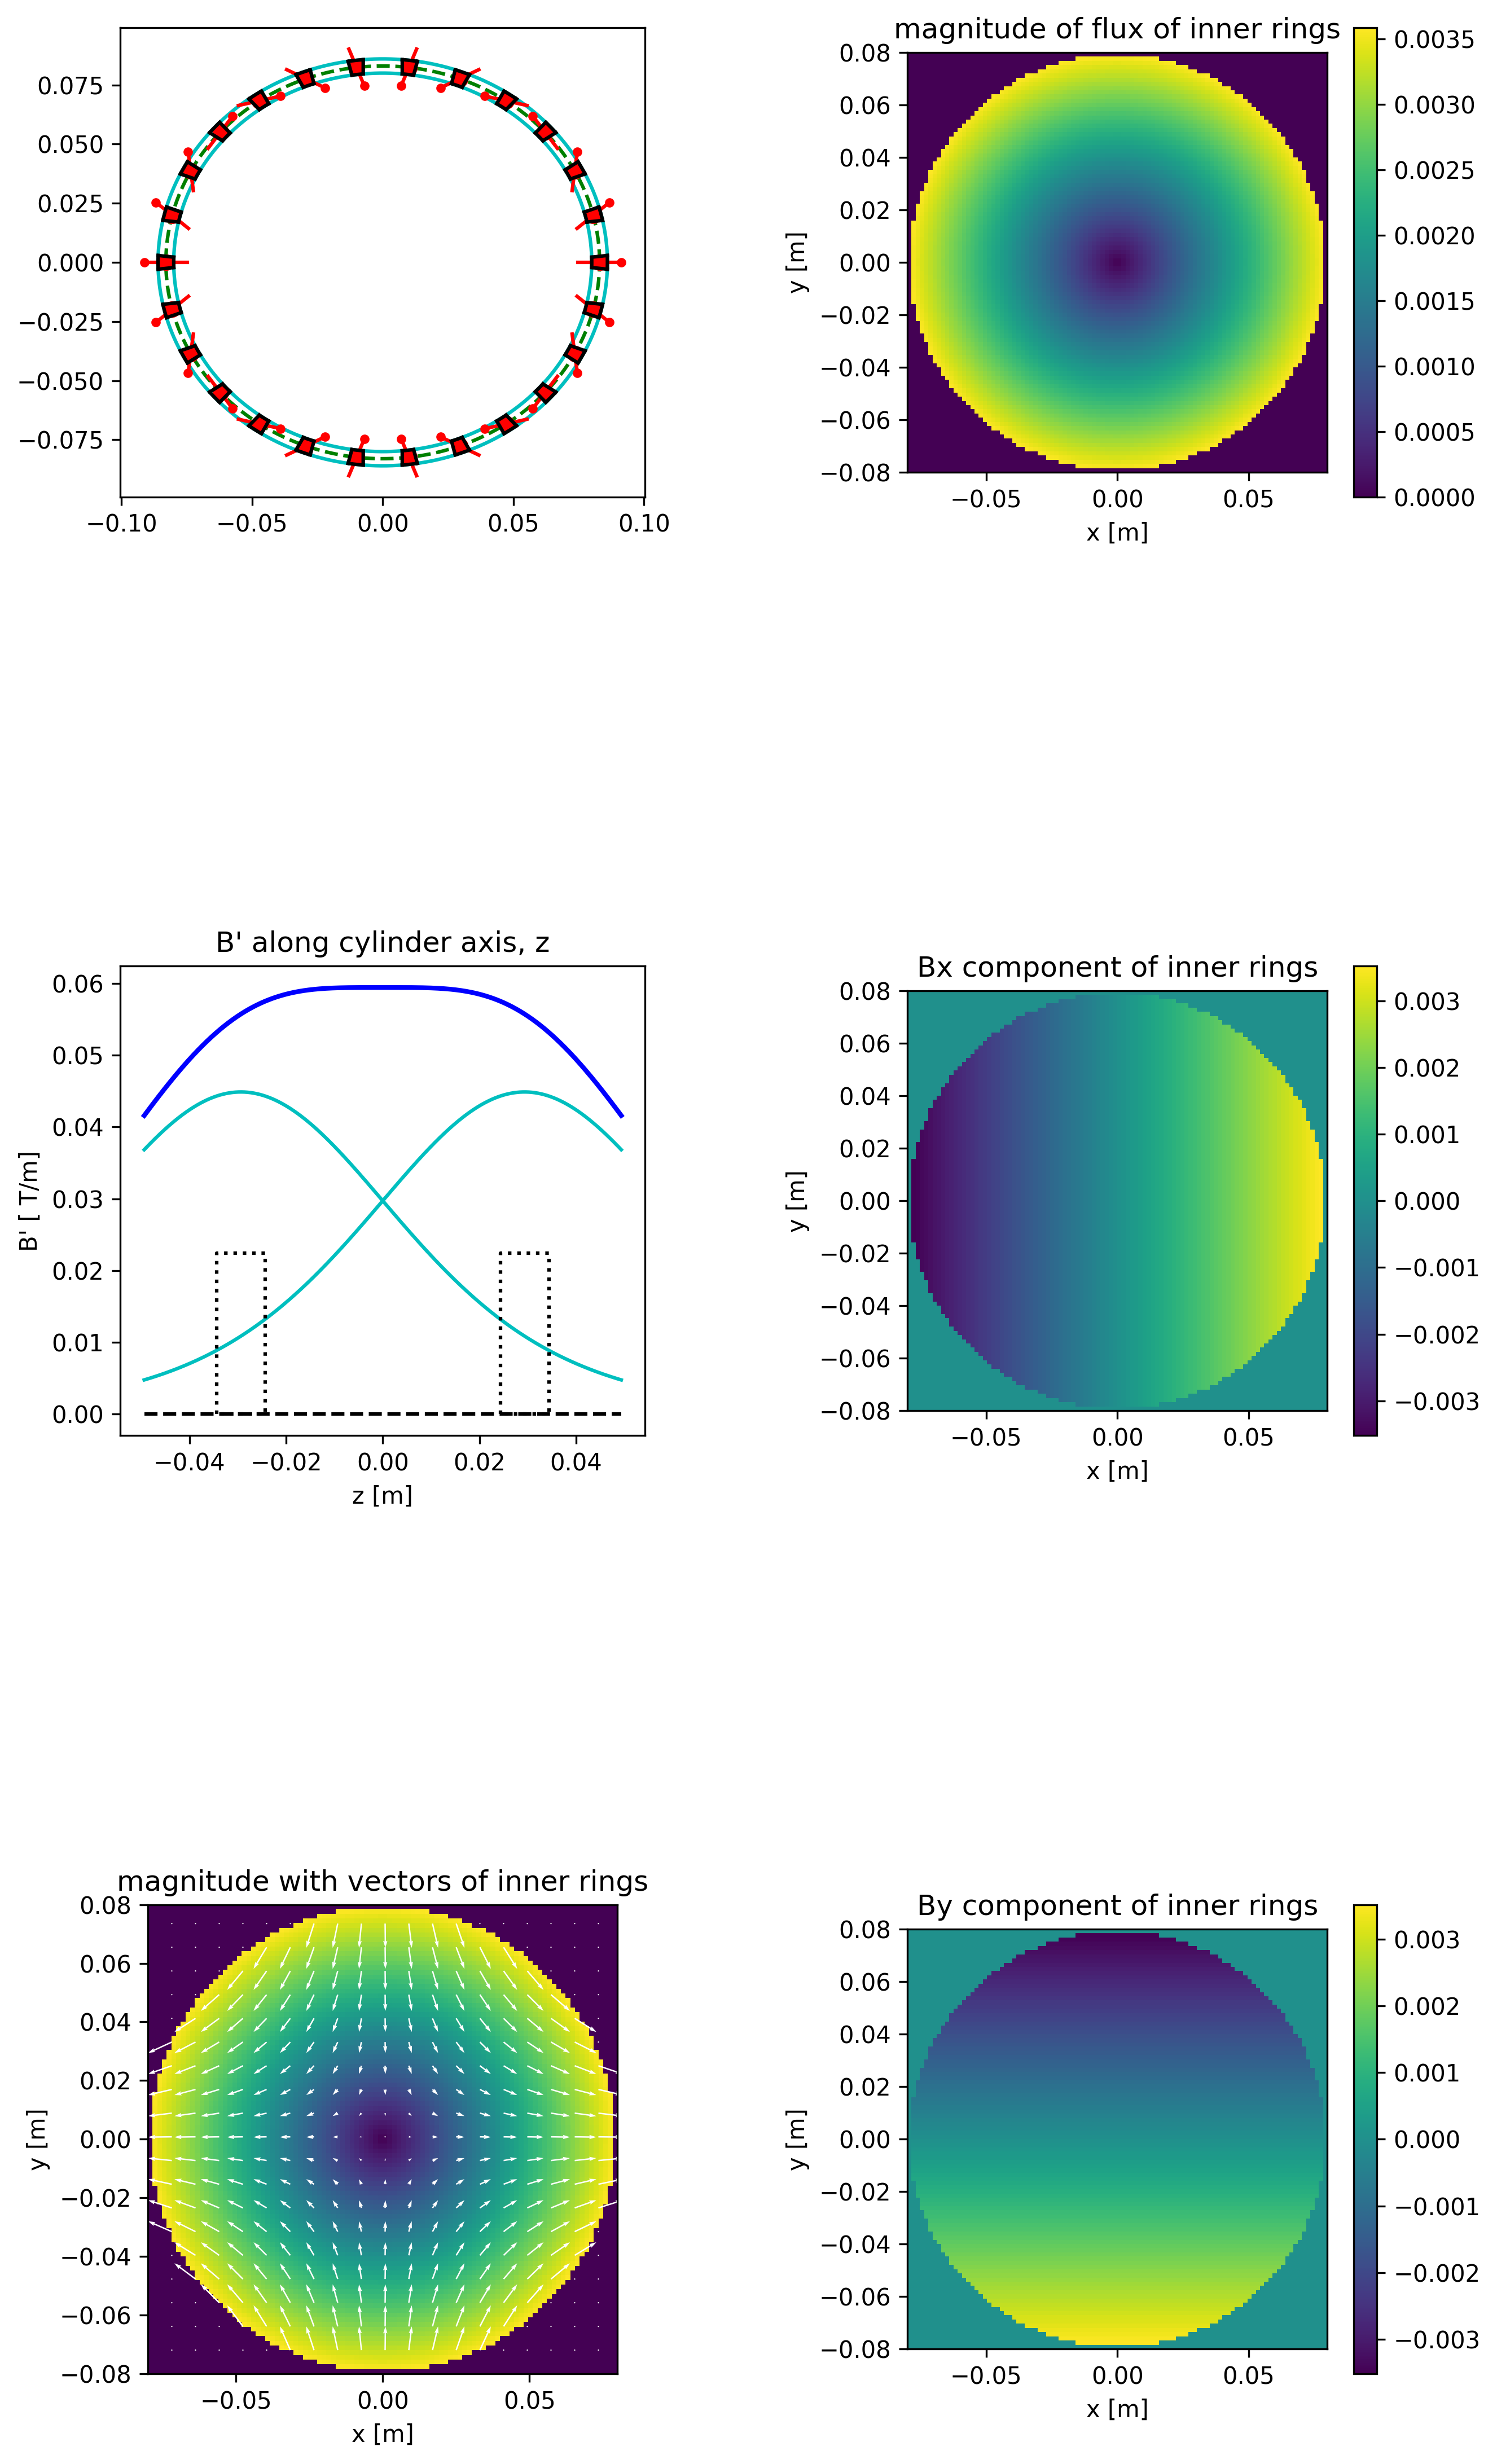

In [648]:
## INNER SEGMENT

fig, axs = plt.subplots(3,2,figsize=(10, 18), dpi=300);

# plot geometry in xy plane
pa=np.linspace(0,2*np.pi,1000);
axs[0, 0].plot(ro1*np.cos(pa),ro1*np.sin(pa),'c');  #plot outer diameter
axs[0, 0].plot(ri1*np.cos(pa),ri1*np.sin(pa),'c');  #plot inner diameter
axs[0, 0].plot(R1*np.cos(pa),R1*np.sin(pa),'g--');  #plot central diameter R
Px1=np.zeros((typ,N1));   #this is where the vertices are stored
Py1=np.zeros((typ,N1));
for jj in range(N1):
    ux1=R1*np.cos((jj+1)*2*np.pi/N1);   #center of magnets on R
    uy1=R1*np.sin((jj+1)*2*np.pi/N1);
    La1=R1/10;                         #length of magnetization arrow
    axs[0, 0].plot(ux1,uy1,'ro');            #plot centers of magnets
    alph1=(k+1)*(jj+1)*2*np.pi/N1;     #orientation angle of magnetization
    axs[0, 0].plot([ux1-La1*np.cos(alph1),ux1+La1*np.cos(alph1)],[uy1-La1*np.sin(alph1),uy1+La1*np.sin(alph1)],'r'); #plot magnetization arrow
    axs[0, 0].plot(ux1+La1*np.cos(alph1),uy1+La1*np.sin(alph1),'r.');    #plot arrow tip
    if (typ==1):    #plot segments
         pia1=2*np.pi*(jj+1)/N1-np.pi/N1+np.arctan(d/2/ri1);
         pie1=2*np.pi*(jj+1)/N1+np.pi/N1-np.arctan(d/2/ri1);
         pci1=np.linspace(pia1,pie1,50);
         axs[0, 0].plot(ri1*np.cos(pci1),ri1*np.sin(pci1),'k')
         poa1=2*np.pi*(jj+1)/N1-np.pi/N1+np.arctan(d/2/ro1);
         poe1=2*np.pi*(jj+1)/N1+np.pi/N1-np.arctan(d/2/ro1);
         pco1=np.linspace(poa1,poe1,50);
         axs[0, 0].plot(ro1*np.cos(pco1),ro1*np.sin(pco1),'k')
         axs[0, 0].plot([ri1*np.cos(pci1[0]),ro1*np.cos(pco1[0])],[ri1*np.sin(pci1[0]),ro1*np.sin(pco1[0])],'k')
         axs[0, 0].plot([ri1*np.cos(pci1[-1]),ro1*np.cos(pco1[-1])],[ri1*np.sin(pci1[-1]),ro1*np.sin(pco1[-1])],'k')

#plot of geometry and field along z-direction
z1=np.linspace(np.min(Z01)-L*2, np.max(Z01)+L*2,2000);
Bz1=np.zeros(len(z1));
for kk in range(len(Z01)):
    B1=R1**(2*k+3)*(R1**2+(z1-Z01[kk])**2)**(-k-1.5)*B01*fs1*fm1*fM1*fL1;
    axs[1, 0].plot(z1,B1,'c');
    Bz1=Bz1+B1;

#output of central field in stacked rings
s='stacking {0:.0f} rings with Z0 distances:  in center >> '.format(len(Z01)); 
s=s+flux;
s=s+' = {0:.3f}'.format(Bz1[int(len(Bz1)/2)]);
s=s+unit;
print(s.rjust(alignvalue));

#continue plotting 
axs[1, 0].plot(z1,Bz1,'b',lw=2);
A1=B01*fs1*fm1*fM1*fL1/2;
for kk in range(len(Z01)): #plot rectangles at position of magnet rings
  rec_x1 =[Z01[kk]-L/2,Z01[kk]-L/2,Z01[kk]+L/2,Z01[kk]+L/2,Z01[kk]-L/2];
  rec_y1 =[0,A1,A1,0,0];
  axs[1, 0].plot(rec_x1,rec_y1,'k:');
axs[1, 0].plot([np.min(Z01)-L*2,np.max(Z01)+L*2],[0,0],'k--'); #plot baseline 
s=flux+' along cylinder axis, z';
axs[1, 0].set_title(s);
s=flux+' ['+unit+']';
axs[1, 0].set_ylabel(s);
axs[1, 0].set_xlabel('z [m]')
axs[1, 0].axis('tight');


#plot magnitude of flux with overlayed vector plot
extent1=-ri1, ri1, -ri1, ri1;
axs[2, 0].imshow(np.rot90(Ba1,1), extent=extent1);
axs[2, 0].set_title('magnitude with vectors of inner rings');
axs[2, 0].set_xlabel('x [m]');
axs[2, 0].set_ylabel('y [m]');

#reduce resolution for vector plot by scale
dx=int(np.floor(nx/scale));
dy=int(np.floor(ny/scale));
Qx1=np.zeros((dx,dy));
Qy1=np.zeros((dx,dy));
Xq1=np.zeros(dx);
Yq1=np.zeros(dy);
jx=-1;
for ix in range(0,nx,scale): #now sort B values in a reduced matrix
    jx=jx+1;
    Xq1[jx]=Xx1[ix];
    jy=-1;
    for iy in range(0,ny,scale):
        jy=jy+1;
        Qx1[jx,jy]=Bx1[iy,ix];  #calc the transpose that's why x/y are swapped
        Qy1[jx,jy]=By1[iy,ix];
        Yq1[jy]=Yy1[iy];
axs[2, 0].quiver(Xq1,Yq1,Qx1,Qy1,color='w');

#plot magnitude of flux
extent1=-ri1, ri1, -ri1, ri1
fig1=axs[0, 1].imshow(np.rot90(Ba1,1), extent=extent1)
axs[0, 1].set_title('magnitude of flux of inner rings')
axs[0, 1].set_xlabel('x [m]')
axs[0, 1].set_ylabel('y [m]')
fig.colorbar(fig1, ax=axs[0, 1]);

#plot Bx1
fig2=axs[1, 1].imshow(np.rot90(Bx1,1), extent=extent1)
axs[1, 1].set_title('Bx component of inner rings')
axs[1, 1].set_xlabel('x [m]')
axs[1, 1].set_ylabel('y [m]')
fig.colorbar(fig2, ax=axs[1,1]);

#plot By1
fig3=axs[2, 1].imshow(np.rot90(By1,1), extent=extent1)
axs[2, 1].set_title('By component of inner rings')
axs[2, 1].set_xlabel('x [m]')
axs[2, 1].set_ylabel('y [m]')
fig.colorbar(fig3, ax=axs[2, 1]);

print(' - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -');
s='the vertices of the polygons are saved in the variables Px and Py';
print(s.center(alignvalue));
s='2nd plot shows {0:.0f} rings at positions in variable Z0'.format(len(Z01));
print(s.center(alignvalue));
print(' ');
print('__________________________________________________________________________________________');
plt.subplots_adjust(wspace=0.5, hspace=1)  # Adjust spacing between sub-plots
plt.show()

### OUTER SEGMENT PLOTS

                          stacking 2 rings with Z0 distances:  in center >> B' = 0.043 T/m
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
            the vertices of the polygons are saved in the variables Px and Py             
                    2nd plot shows 2 rings at positions in variable Z0                    
 
__________________________________________________________________________________________


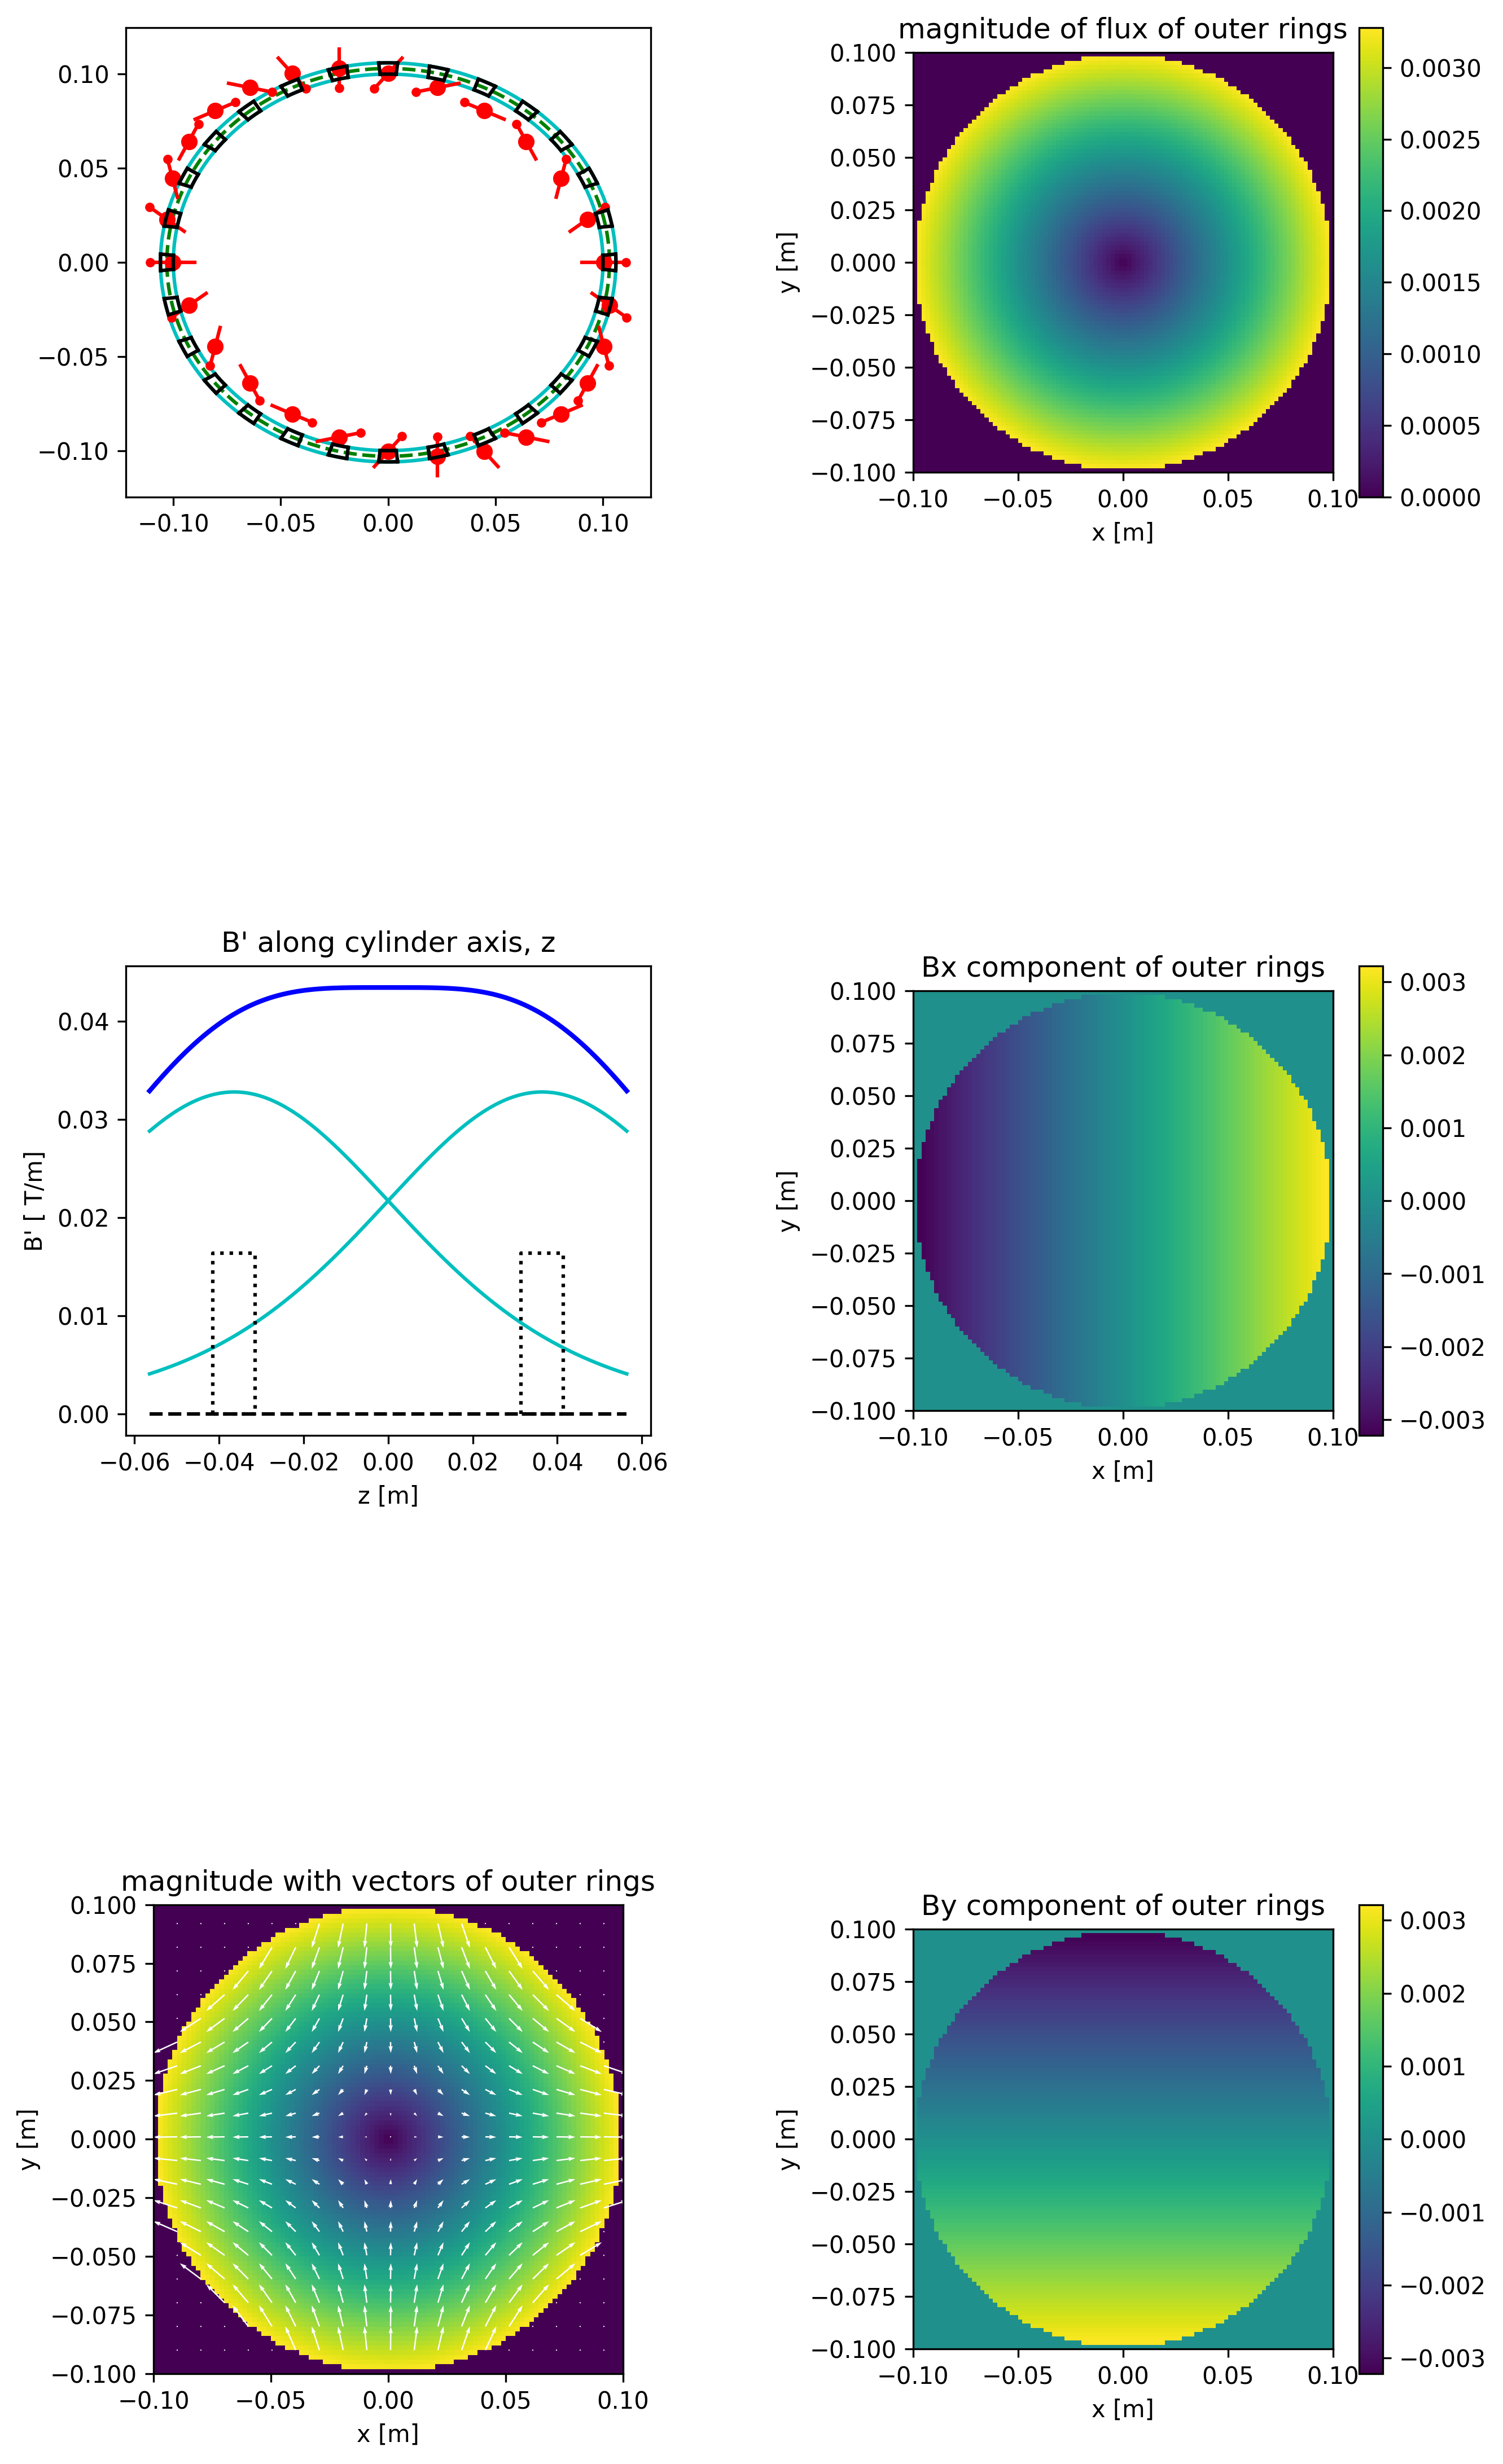

In [649]:
fig, axs = plt.subplots(3,2,figsize=(10, 18), dpi=300);

# plot geometry in xy plane
pa=np.linspace(0,2*np.pi,1000);
axs[0, 0].plot(ro2*np.cos(pa),ro2*np.sin(pa),'c');  #plot outer diameter
axs[0, 0].plot(ri2*np.cos(pa),ri2*np.sin(pa),'c');  #plot inner diameter
axs[0, 0].plot(R2*np.cos(pa),R2*np.sin(pa),'g--');  #plot central diameter R
Px2=np.zeros((typ,N2));   #this is where the vertices are stored
Py2=np.zeros((typ,N2));
for jj in range(N2):
    ux2=R2*np.cos((jj+2)*2*np.pi/N2);   #center of magnets on R
    uy2=R2*np.sin((jj+1)*2*np.pi/N2);
    La2=R2/10;                         #length of magnetization arrow
    axs[0, 0].plot(ux2,uy2,'ro');            #plot centers of magnets
    alph2=(k+1)*(jj+1)*2*np.pi/N2;     #orientation angle of magnetization
    axs[0, 0].plot([ux2-La2*np.cos(alph2),ux2+La2*np.cos(alph2)],[uy2-La2*np.sin(alph2),uy2+La2*np.sin(alph2)],'r'); #plot magnetization arrow
    axs[0, 0].plot(ux2+La2*np.cos(alph2),uy2+La2*np.sin(alph2),'r.');    #plot arrow tip
    if (typ==1):    #plot segments
         pia2=2*np.pi*(jj+1)/N2-np.pi/N2+np.arctan(d/2/ri2);
         pie2=2*np.pi*(jj+1)/N2+np.pi/N2-np.arctan(d/2/ri2);
         pci2=np.linspace(pia2,pie2,50);
         axs[0, 0].plot(ri2*np.cos(pci2),ri2*np.sin(pci2),'k')
         poa2=2*np.pi*(jj+1)/N2-np.pi/N2+np.arctan(d/2/ro2);
         poe2=2*np.pi*(jj+1)/N2+np.pi/N2-np.arctan(d/2/ro2);
         pco2=np.linspace(poa2,poe2,50);
         axs[0, 0].plot(ro2*np.cos(pco2),ro2*np.sin(pco2),'k')
         axs[0, 0].plot([ri2*np.cos(pci2[0]),ro2*np.cos(pco2[0])],[ri2*np.sin(pci2[0]),ro2*np.sin(pco2[0])],'k')
         axs[0, 0].plot([ri2*np.cos(pci2[-1]),ro2*np.cos(pco2[-1])],[ri2*np.sin(pci2[-1]),ro2*np.sin(pco2[-1])],'k')

#plot of geometry and field along z-direction
z2=np.linspace(np.min(Z02)-L*2, np.max(Z02)+L*2,2000);
Bz2=np.zeros(len(z2));
for kk in range(len(Z02)):
    B2=R2**(2*k+3)*(R2**2+(z2-Z02[kk])**2)**(-k-1.5)*B02*fs2*fm2*fM2*fL2;
    axs[1, 0].plot(z2,B2,'c');
    Bz2=Bz2+B2;

#output of central field in stacked rings
s='stacking {0:.0f} rings with Z0 distances:  in center >> '.format(len(Z02)); 
s=s+flux;
s=s+' = {0:.3f}'.format(Bz2[int(len(Bz2)/2)]);
s=s+unit;
print(s.rjust(alignvalue));

#continue plotting 
axs[1, 0].plot(z2,Bz2,'b',lw=2);
A2=B02*fs2*fm2*fM2*fL2/2;
for kk in range(len(Z02)): #plot rectangles at position of magnet rings
  rec_x2 =[Z02[kk]-L/2,Z02[kk]-L/2,Z02[kk]+L/2,Z02[kk]+L/2,Z02[kk]-L/2];
  rec_y2 =[0,A2,A2,0,0];
  axs[1, 0].plot(rec_x2,rec_y2,'k:');
axs[1, 0].plot([np.min(Z02)-L*2,np.max(Z02)+L*2],[0,0],'k--'); #plot baseline 
s=flux+' along cylinder axis, z';
axs[1, 0].set_title(s);
s=flux+' ['+unit+']';
axs[1, 0].set_ylabel(s);
axs[1, 0].set_xlabel('z [m]')
axs[1, 0].axis('tight');


#plot magnitude of flux with overlayed vector plot
extent2=-ri2, ri2, -ri2, ri2;
axs[2, 0].imshow(np.rot90(Ba2,1), extent=extent2);
axs[2, 0].set_title('magnitude with vectors of outer rings');
axs[2, 0].set_xlabel('x [m]');
axs[2, 0].set_ylabel('y [m]');

#reduce resolution for vector plot by scale
dx=int(np.floor(nx/scale));
dy=int(np.floor(ny/scale));
Qx2=np.zeros((dx,dy));
Qy2=np.zeros((dx,dy));
Xq2=np.zeros(dx);
Yq2=np.zeros(dy);
jx=-1;
for ix in range(0,nx,scale): #now sort B values in a reduced matrix
    jx=jx+1;
    Xq2[jx]=Xx2[ix];
    jy=-1;
    for iy in range(0,ny,scale):
        jy=jy+1;
        Qx2[jx,jy]=Bx2[iy,ix];  #calc the transpose that's why x/y are swapped
        Qy2[jx,jy]=By2[iy,ix];
        Yq2[jy]=Yy2[iy];
axs[2, 0].quiver(Xq2,Yq2,Qx2,Qy2,color='w');

#plot magnitude of flux
extent2=-ri2, ri2, -ri2, ri2
fig1=axs[0, 1].imshow(np.rot90(Ba2,1), extent=extent2)
axs[0, 1].set_title('magnitude of flux of outer rings')
axs[0, 1].set_xlabel('x [m]')
axs[0, 1].set_ylabel('y [m]')
fig.colorbar(fig1, ax=axs[0, 1]);

#plot Bx1
fig2=axs[1, 1].imshow(np.rot90(Bx2,1), extent=extent2)
axs[1, 1].set_title('Bx component of outer rings')
axs[1, 1].set_xlabel('x [m]')
axs[1, 1].set_ylabel('y [m]')
fig.colorbar(fig2, ax=axs[1,1]);

#plot By1
fig3=axs[2, 1].imshow(np.rot90(By2,1), extent=extent2)
axs[2, 1].set_title('By component of outer rings')
axs[2, 1].set_xlabel('x [m]')
axs[2, 1].set_ylabel('y [m]')
fig.colorbar(fig3, ax=axs[2, 1]);

print(' - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -');
s='the vertices of the polygons are saved in the variables Px and Py';
print(s.center(alignvalue));
s='2nd plot shows {0:.0f} rings at positions in variable Z0'.format(len(Z02));
print(s.center(alignvalue));
print(' ');
print('__________________________________________________________________________________________');
plt.subplots_adjust(wspace=0.5, hspace=1)  # Adjust spacing between sub-plots
plt.show()


### COMBINING INNER AND OUTER SEGMENT FIELDS

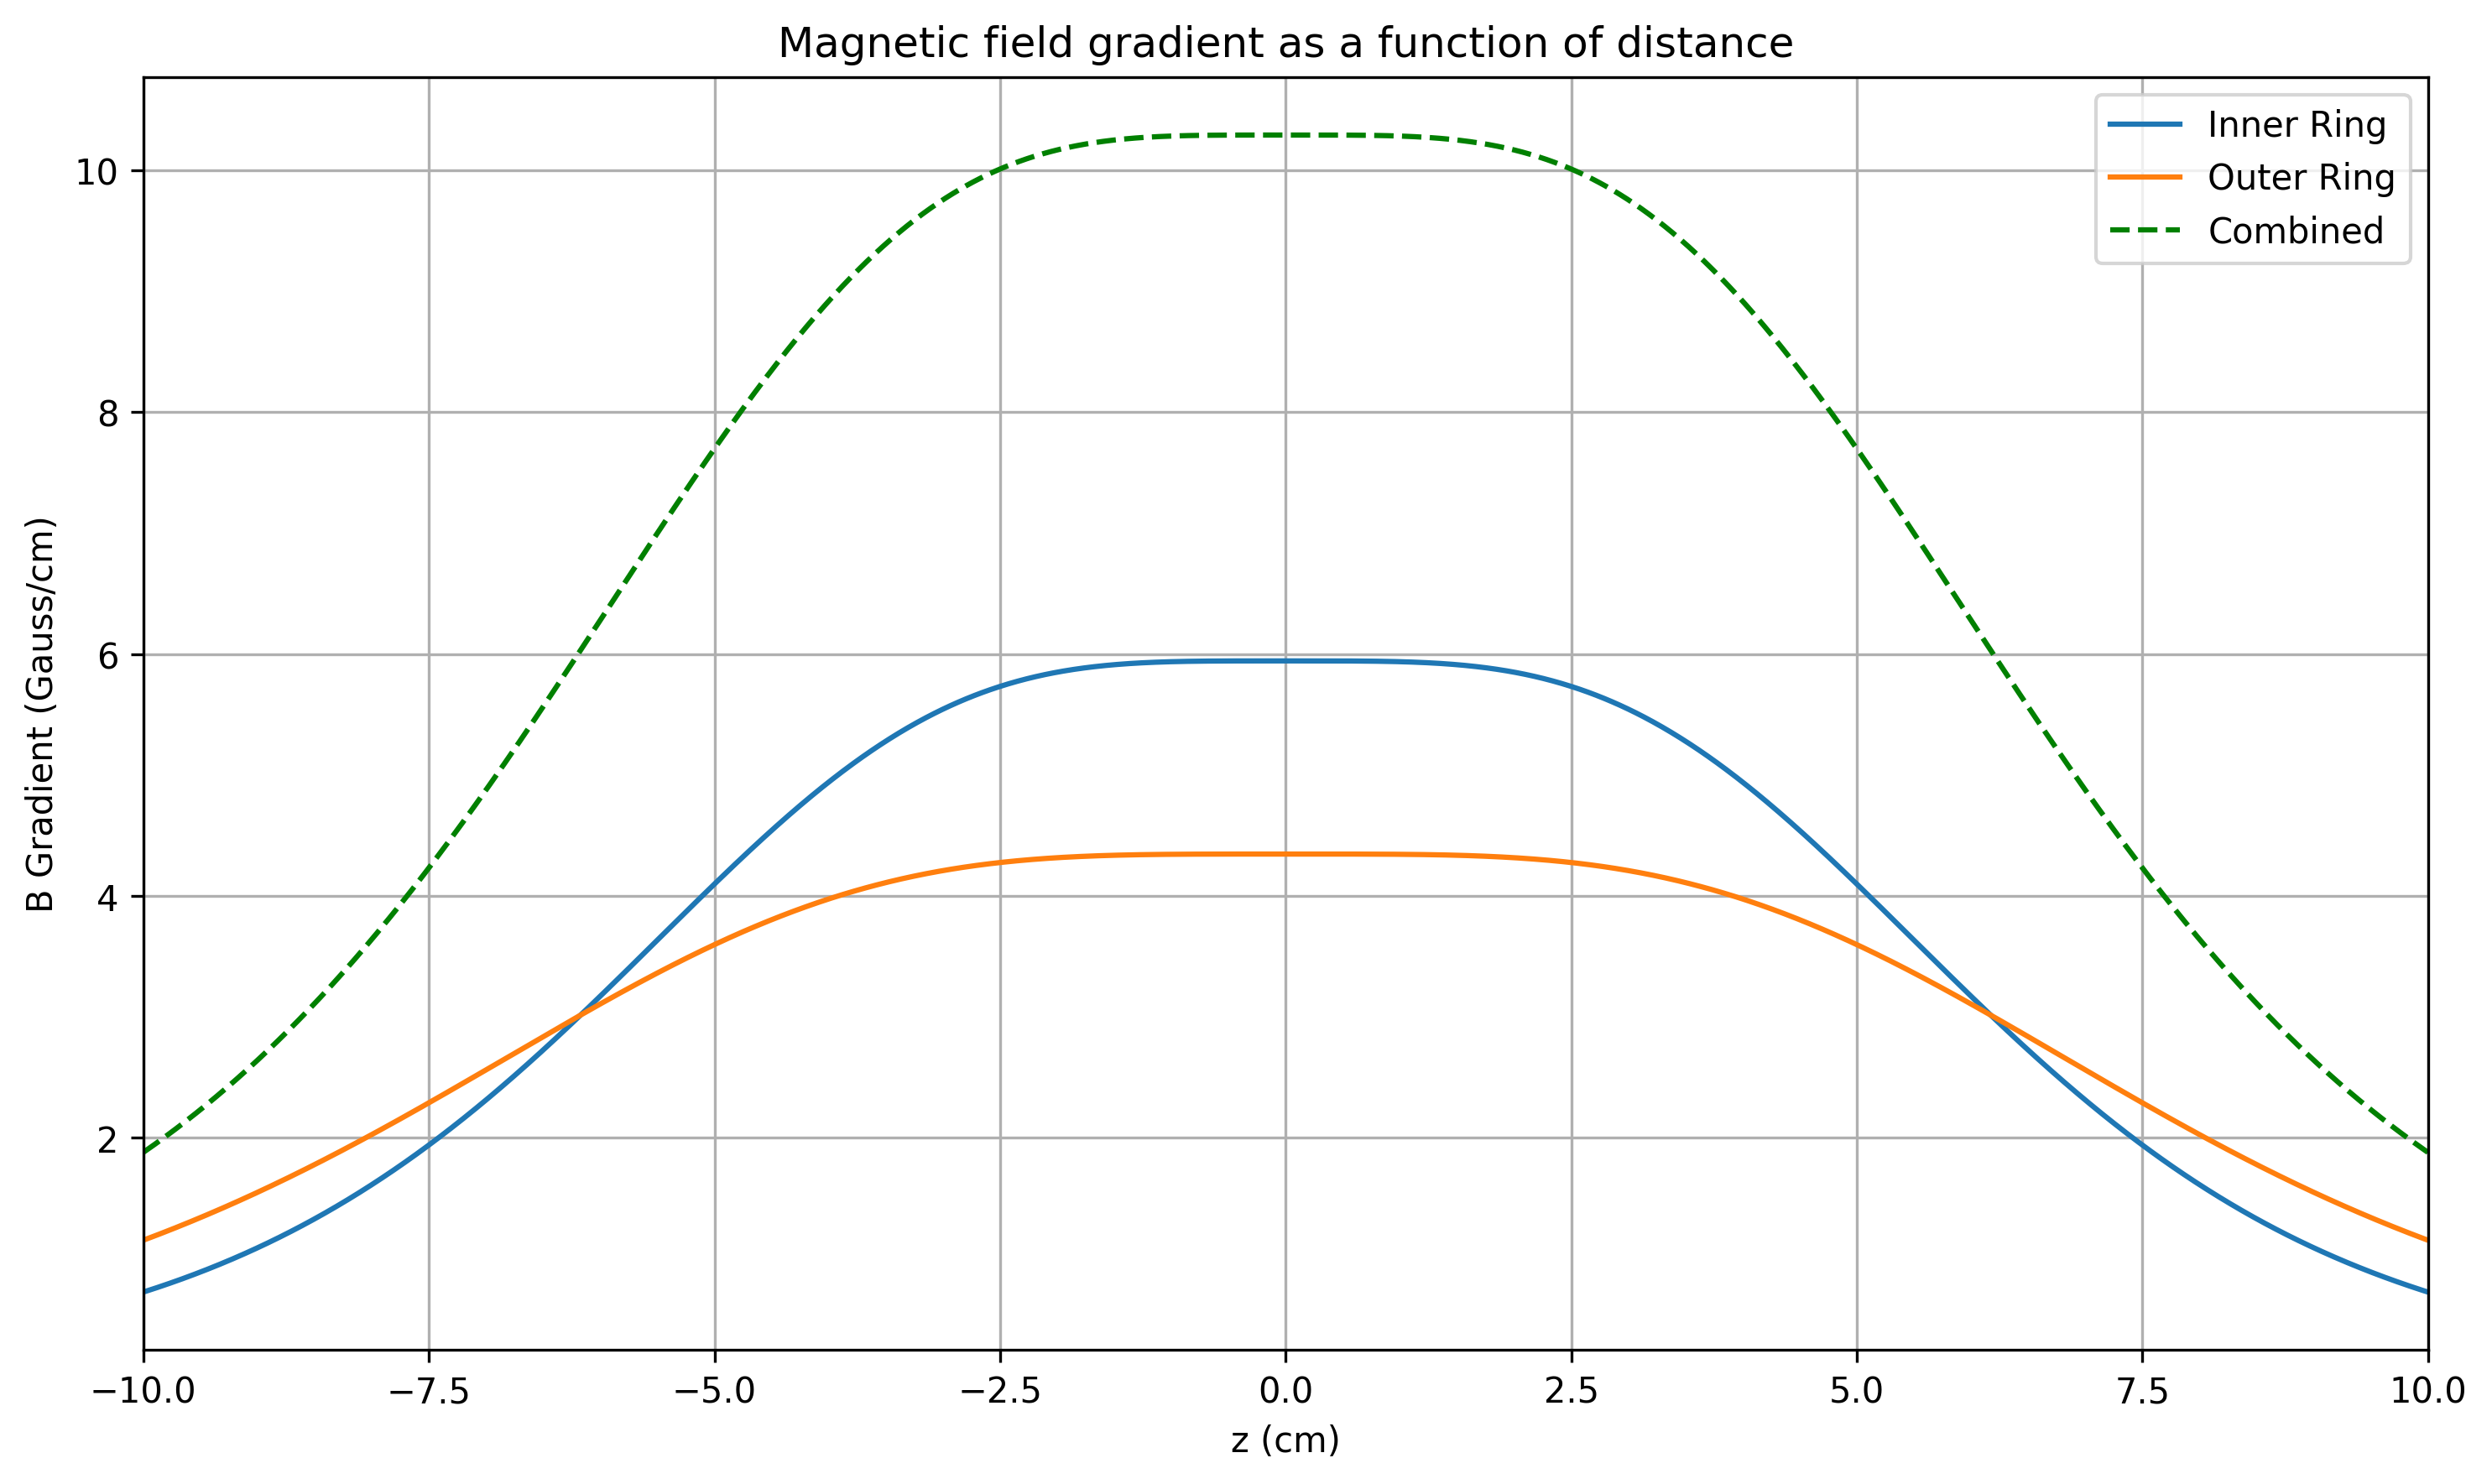

In [650]:
# Recalculate magnetic fields for inner and outer segments
z_vals = np.linspace(-0.1, 0.1, 2000)  # distance range from -10cm to +10cm

Bz_inner = np.zeros(len(z_vals))
Bz_outer = np.zeros(len(z_vals))
for idx, z in enumerate(z_vals):
    # Inner segment
    for z0 in Z01:
        Bz_inner[idx] += R1**(2*k+3)*(R1**2+(z-z0)**2)**(-k-1.5)*B01*fs1*fm1*fM1*fL1
    # Outer segment
    for z0 in Z02:
        Bz_outer[idx] += R2**(2*k+3)*(R2**2+(z-z0)**2)**(-k-1.5)*B02*fs2*fm2*fM2*fL2

# Plot
plt.figure(figsize=(10, 6), dpi=300)
plt.plot(z_vals*100, Bz_inner*100, label='Inner Ring')
plt.plot(z_vals*100, Bz_outer*100, label='Outer Ring')
plt.plot(z_vals*100, (Bz_inner + Bz_outer)*100, 'g--', label='Combined')

plt.xlabel('z (cm)')
plt.ylabel('B Gradient (Gauss/cm)')
plt.title('Magnetic field gradient as a function of distance')
plt.legend()
plt.xlim(-10, 10)
plt.grid(True)
plt.tight_layout()
plt.show()


### HOMOGENEITY

In [651]:
def combined_B_field(z_values):
    # Combined magnetic field calculation
    Bz_combined = np.zeros_like(z_values)
    for z in Z01:
        Bz_combined += R1**(2 * k + 3) * (R1**2 + (z_values - z)**2)**(-k - 1.5) * B01 * fs1 * fm1 * fM1 * fL1
    for z in Z02:
        Bz_combined += R2**(2 * k + 3) * (R2**2 + (z_values - z)**2)**(-k - 1.5) * B02 * fs2 * fm2 * fM2 * fL2

    return Bz_combined

# Recalculating the combined field within the volume of interest
z_min = -2.5  # cm
z_max = 2.5  # cm
z_interest = np.linspace(z_min, z_max, 1000)
B_interest = combined_B_field(z_interest) #scaling factor for T/m to G/cm

# Calculating the average magnetic field over the volume
B_avg = np.mean(B_interest)

# Calculating the integrand for VRMS
integrand = (B_interest - B_avg)**2

# Integrating using Simpson's rule
integral_value = simps(integrand, z_interest)

# Calculating VRMS
L = z_max - z_min
VRMS = np.sqrt(integral_value / L)
print(f"{VRMS} G/cm")



0.015011242732773822 G/cm


Notes: Adjust the dpi to 300 of the plots and fix the subcaptions. Add a global caption. Add magnetic field scale in the vector plot.